In [1]:
#Find Distance
import osmnx as ox
import networkx as nx
import numpy as np
from IPython.display import IFrame
import folium
%matplotlib inline

np.random.seed(0)
ox.__version__

ox.config(log_console=True, use_cache=True)
place = "Milan, Italy"
G = ox.graph_from_place(place, network_type="drive")
Gp = ox.project_graph(G)

c:\Users\lucaf\AppData\Local\Programs\Python\Python311\Lib\site-packages\osmnx\utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


In [2]:

points = ox.utils_geo.sample_points(ox.get_undirected(Gp), n=100)
X = points.x.values
Y = points.y.values
X0 = X.mean()
Y0 = Y.mean()


# find each nearest node to several points, and optionally return distance
nodes, dists = ox.nearest_nodes(Gp, X, Y, return_dist=True)
edges, dists = ox.nearest_edges(Gp, X, Y, return_dist=True)



In [3]:
orig = list(G)[0]
dest = list(G)[120]
route = ox.shortest_path(G, orig, dest, weight="length")
#AD Speed
# impute speed on all edges missing data
G = ox.add_edge_speeds(G)
# calculate travel time (seconds) for all edges
G = ox.add_edge_travel_times(G)

In [4]:

# see mean speed/time values by road type
edges = ox.graph_to_gdfs(G, nodes=False)
edges["highway"] = edges["highway"].astype(str)
edges.groupby("highway")[["length", "speed_kph", "travel_time"]].mean().round(1)

# same thing again, but this time pass in a few default speed values (km/hour)
# to fill in edges with missing `maxspeed` from OSM
hwy_speeds = {"residential": 35, "secondary": 50, "tertiary": 60}
G = ox.add_edge_speeds(G, hwy_speeds)
G = ox.add_edge_travel_times(G)

# calculate two routes by minimizing travel distance vs travel time
orig = list(G)[1]
dest = list(G)[120]
route1 = ox.shortest_path(G, orig, dest, weight="length")
route2 = ox.shortest_path(G, orig, dest, weight="travel_time")

# compare the two routes
route1_length = int(sum(ox.utils_graph.get_route_edge_attributes(G, route1, "length")))
route2_length = int(sum(ox.utils_graph.get_route_edge_attributes(G, route2, "length")))
route1_time = int(sum(ox.utils_graph.get_route_edge_attributes(G, route1, "travel_time")))
route2_time = int(sum(ox.utils_graph.get_route_edge_attributes(G, route2, "travel_time")))
print("Route 1 is", route1_length, "meters and takes", route1_time, "seconds.")
print("Route 2 is", route2_length, "meters and takes", route2_time, "seconds.")


Route 1 is 6992 meters and takes 534 seconds.
Route 2 is 7178 meters and takes 485 seconds.


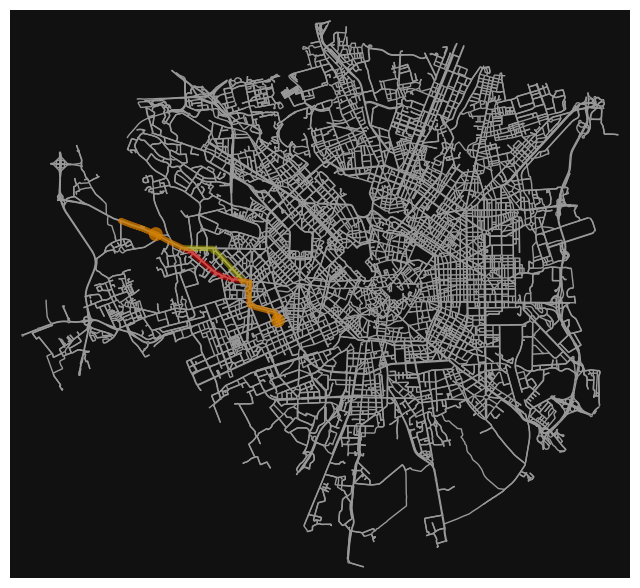

In [5]:


# plot the routes
fig, ax = ox.plot_graph_routes(G, routes=[route1, route2], route_colors=["r", "y"], route_linewidth=6, node_size=0)



In [6]:
m1 = ox.plot_graph_folium(G, popup_attribute="name", weight=2, color="#8b0000")